# Topic: Time Series Analysis of Avocado Price in the US from 2015 to 2019


## Goal1: Predict the price of the avocado (Autoregression)
## Goal 2: Classify the trend of the avocado price time series (KNN)


    
##### Input data：AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv#####
    After the Part 1 of data cleansing and some general feature creation, I created a dataset called AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv b
    The original data I used in this project is from Kaggle page (https://www.kaggle.com/alanluo418/avocado-prices-20152019). All the data was obtained from the Hass Avocado Board website in January of 2020.
    The above page refers to an earlier Kaggle page about Avocado price (https://www.kaggle.com/neuromusic/avocado-prices).





# Preprocessing data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jingliu8876133/AvocadoData/DesignThinkingCourse/AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv'
df = pd.read_csv(url,index_col=0)
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Region,lat,lon,pop
Date,,,,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,2,Albany,42.651167,-73.754968,61394.5
2015-02-08,0.99,51253.97,1357.37,39111.81,163.25,10621.54,10113.10,508.44,0.0,conventional,2015,2,Albany,42.651167,-73.754968,61394.5
2015-02-15,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.0,conventional,2015,2,Albany,42.651167,-73.754968,61394.5
2015-02-22,1.07,45675.05,1088.38,35056.13,151.00,9379.54,9000.16,379.38,0.0,conventional,2015,2,Albany,42.651167,-73.754968,61394.5
2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,3,Albany,42.651167,-73.754968,61394.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21252 entries, 2015-01-04 to 2019-12-01
Data columns (total 16 columns):
AveragePrice    21252 non-null float64
Total Volume    21252 non-null float64
4046            21252 non-null float64
4225            21252 non-null float64
4770            21252 non-null float64
Total Bags      21252 non-null float64
Small Bags      21252 non-null float64
Large Bags      21252 non-null float64
XLarge Bags     21252 non-null float64
type            21252 non-null object
year            21252 non-null int64
Month           21252 non-null int64
Region          21252 non-null object
lat             14674 non-null float64
lon             14674 non-null float64
pop             14674 non-null float64
dtypes: float64(12), int64(2), object(2)
memory usage: 2.8+ MB


In [5]:
#Create conventional and organic avocado dataframes
#These will be used to analyse the region-dependent price
conventional = df[df.type =='conventional']
organic = df[df.type =='organic']

#Create mean conventional and organic avocado dataframes (average over all the regions)
#These will be used to analyse the overall price
conventional_groupByDate = conventional.groupby(conventional.index).mean()
organic_groupByDate = organic.groupby(organic.index).mean()

organic_groupByDate.head()




,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,lat,lon,pop
Date,,,,,,,,,,,,,,
2015-01-04,1.590952,8973.370714,3872.599286,3292.416429,67.307143,1741.047857,1126.128095,614.919762,0.0,2015,1,38.470086,-93.085705,931920.211494
2015-01-11,1.631190,9970.927143,4415.711667,4020.298810,58.582381,1476.334286,1106.319286,370.015000,0.0,2015,1,38.470086,-93.085705,931920.211494
2015-01-18,1.650952,10376.154048,3882.991667,4813.279286,62.782857,1617.100238,1001.213571,615.886667,0.0,2015,1,38.470086,-93.085705,931920.211494
2015-01-25,1.681190,7816.676190,3195.160952,3058.375714,74.775952,1488.363571,963.052143,525.311429,0.0,2015,1,38.470086,-93.085705,931920.211494
2015-02-01,1.530952,10987.513571,4773.649762,3946.240476,90.515952,2177.107381,1525.291429,651.815952,0.0,2015,2,38.470086,-93.085705,931920.211494


In [6]:
conventional.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Region,lat,lon,pop
Date,,,,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,1,Albany,42.651167,-73.754968,61394.5
2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,2,Albany,42.651167,-73.754968,61394.5


## Overall price
The conventional avocado total volume is more than 10 times higher than that of organic one. 
So it is more interesting to focus on analyse the price of the conventional ones. 

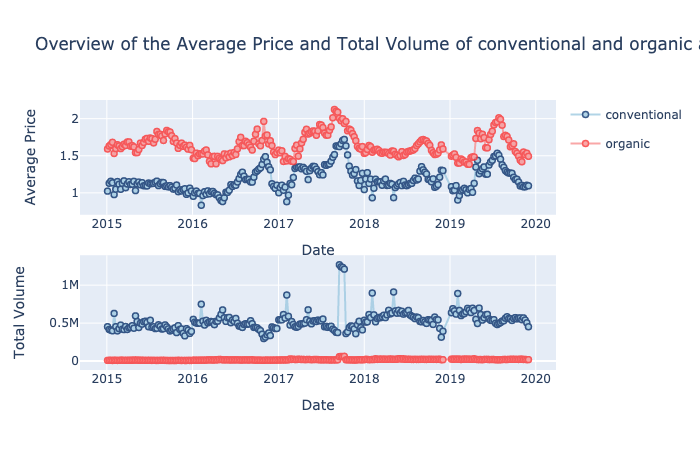

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)


fig.append_trace(go.Scatter(
    x=conventional_groupByDate.index,y=conventional_groupByDate.AveragePrice,
                   name='conventional',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=organic_groupByDate.index,y=organic_groupByDate.AveragePrice,
                   name='organic',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)


fig.append_trace(go.Scatter(
    x=conventional_groupByDate.index,y=conventional_groupByDate['Total Volume'],
                   name='conventional',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=organic_groupByDate.index,y=organic_groupByDate['Total Volume'],
                   name='organic',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Total Volume",  row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Overview of the Average Price and Total Volume of conventional and organic avocados"
                 )
# iplot(fig) #Makes it interactive in the notebook.
fig.show('png')#To show in output pdf.
    
    

# Model deployment

## Applying autoregression to the overall price for conventional avocado

In [8]:
conventional_groupByDate.head()
#The data were taken on every sunday.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,lat,lon,pop
Date,,,,,,,,,,,,,,
2015-01-04,1.023095,452792.309048,169999.238571,204010.985238,13105.187619,65676.897619,51942.525476,13419.825238,314.546905,2015,1,38.470086,-93.085705,931920.211494
2015-01-11,1.129286,416093.166190,159302.855238,176420.070952,13413.688810,66956.551190,55923.859286,10754.162381,278.529524,2015,1,38.470086,-93.085705,931920.211494
2015-01-18,1.155714,407344.573095,160297.792143,167029.106667,12076.014524,67941.659762,56556.129762,11255.201905,130.328095,2015,1,38.470086,-93.085705,931920.211494
2015-01-25,1.135238,398688.421190,159704.543095,154715.784048,12052.642381,72215.451667,59854.894048,12211.712619,148.845000,2015,1,38.470086,-93.085705,931920.211494
2015-02-01,0.976190,628154.752381,255211.957381,272599.320000,20644.239524,79699.235476,62604.844762,16334.742619,759.648095,2015,2,38.470086,-93.085705,931920.211494


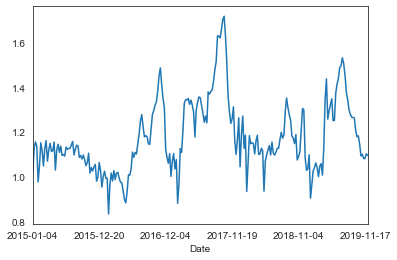

In [9]:
#Let's have a quick look at the time series of the averageprice we want to predict. It is a weekly frequency data.
conventional_AveragePrice = conventional_groupByDate['AveragePrice']
conventional_AveragePrice.plot()

In [10]:
 #conventional_AveragePrice.to_frame().values
df = conventional_AveragePrice.copy()
df = df.to_frame()
df.head()

,AveragePrice
Date,
2015-01-04,1.023095
2015-01-11,1.129286
2015-01-18,1.155714
2015-01-25,1.135238
2015-02-01,0.976190


### Exploration

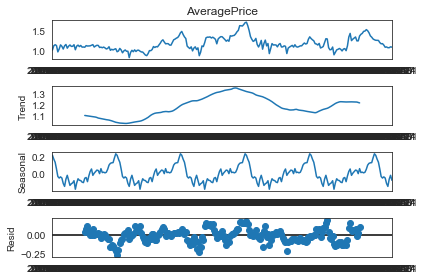

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['AveragePrice'], model='additive',period=48)
x = decomposed.plot() #See note below about this

In [12]:
# create lagged dataset
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.907343
t+1  0.907343  1.000000


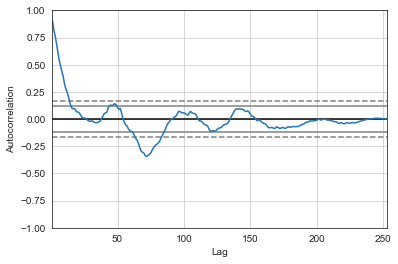

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.show()

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

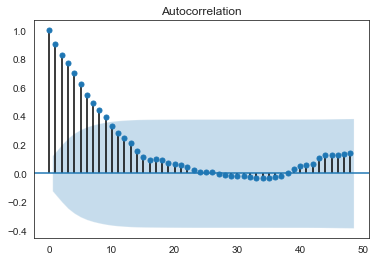

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=48)
pyplot.show()

### Autoregression Model

Coefficients: [0.1087444 0.9082185]
Coefficients: [0.1064432  0.89155838 0.01854626]
Coefficients: [ 0.09547362  0.89003485 -0.07515389  0.10467842]
Coefficients: [ 0.10612441  0.89599372 -0.07573954  0.17851776 -0.08774981]
Coefficients: [ 0.11012061  0.89851546 -0.07183127  0.17334748 -0.0431607  -0.04946393]
Coefficients: [ 0.11760772  0.89098554 -0.06040411  0.17897187 -0.05043207  0.02248087
 -0.08094893]
Coefficients: [ 0.10944626  0.89770557 -0.06240876  0.17884431 -0.06156126  0.02766102
 -0.13883749  0.06634127]
Coefficients: [ 0.10681407  0.89463864 -0.05227754  0.17632855 -0.07164555  0.02827187
 -0.13510626  0.03988674  0.0301823 ]
Coefficients: [ 0.10315024  0.89779675 -0.0554656   0.17398901 -0.07134943  0.04033745
 -0.14513938  0.04048702  0.01286273  0.01967879]
Best lag number is:  6


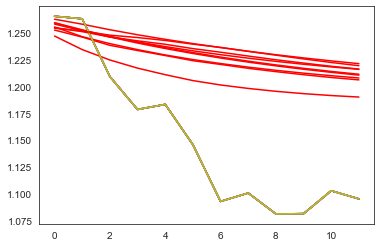

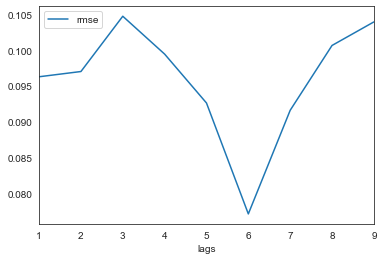

In [15]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# # load dataset
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset

X = df.values
train, test = X[1:len(X)-12], X[len(X)-12:]
# Find the best lag
# train autoregression
cols = ['lags', 'rmse']
lst = []
#10 is chosen based on plt_pcf
for lag in range(1,10):
    model = AutoReg(train, lags=lag)
    model_fit = model.fit()
    print('Coefficients: %s' % model_fit.params)
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(test, predictions))
    lst.append([lag, rmse])

    # plot results
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
#     pyplot.show()
best_lag_num = pd.DataFrame(lst, columns=cols)
best_lag_num.plot(x='lags',y='rmse')
best_lag = best_lag_num[best_lag_num.rmse==best_lag_num.rmse.min()].lags.values[0]
print('Best lag number is: ',best_lag)

Coefficients: [ 0.11760772  0.89098554 -0.06040411  0.17897187 -0.05043207  0.02248087
 -0.08094893]
Test RMSE: 0.104
Number of lags: 6


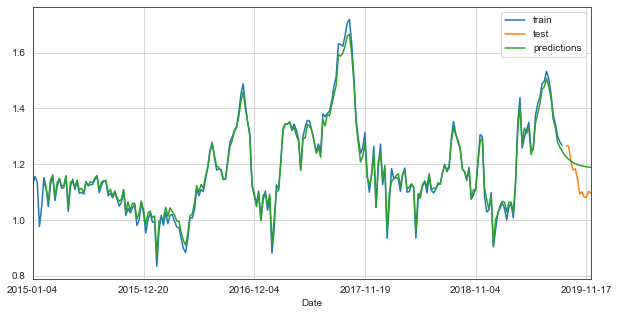

In [16]:
# # make predictions only for the testset part
# predictions = model_fit.predict(start=len(train, end=len(train)+len(test)-1, dynamic=False)
# make predictions beyond the testset.
model = AutoReg(train, lags=best_lag)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
rmse = sqrt(mean_squared_error(test, predictions))
predictions = model_fit.predict(start=0, end=len(df), dynamic=False)
print('Test RMSE: %.3f' % rmse)
print('Number of lags: %.0f' % len(model_fit.ar_lags))
# plot results

#Make a dataframe for the results of the predictions
pred_result_df=df.copy()
#Prediction column
pred_result_df.loc[-predictions.shape[0]:,'predictions']=predictions
#Train column
pred_result_df.loc[:train.shape[0],'train']=train.reshape(1,-1)
#Test column
pred_result_df.loc[-test.shape[0]:,'test']=test.reshape(1,-1)
pred_result_df.plot(y=['train', 'test','predictions'],figsize=(10,5), grid=True)

## Classification of the trend of the time series
We create a feature which describes the trend of the time series: by comparing to the last time stamp with the values from the current timestamp. We can say if the Avocado Price has been Increased, Decreased or Flat (has not changed)

In [84]:
conventional_groupByDate.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,lat,lon,pop,PriceDiff,Trend
Date,,,,,,,,,,,,,,,,
2015-01-04,1.023095,452792.309048,169999.238571,204010.985238,13105.187619,65676.897619,51942.525476,13419.825238,314.546905,2015,1,38.470086,-93.085705,931920.211494,NaN,Not sure
2015-01-11,1.129286,416093.166190,159302.855238,176420.070952,13413.688810,66956.551190,55923.859286,10754.162381,278.529524,2015,1,38.470086,-93.085705,931920.211494,0.106190,Increased
2015-01-18,1.155714,407344.573095,160297.792143,167029.106667,12076.014524,67941.659762,56556.129762,11255.201905,130.328095,2015,1,38.470086,-93.085705,931920.211494,0.026429,Increased
2015-01-25,1.135238,398688.421190,159704.543095,154715.784048,12052.642381,72215.451667,59854.894048,12211.712619,148.845000,2015,1,38.470086,-93.085705,931920.211494,-0.020476,Decreased
2015-02-01,0.976190,628154.752381,255211.957381,272599.320000,20644.239524,79699.235476,62604.844762,16334.742619,759.648095,2015,2,38.470086,-93.085705,931920.211494,-0.159048,Decreased


In [85]:
conventional_groupByDate['PriceDiff'] =conventional_groupByDate.AveragePrice.diff()

In [89]:
def determine_trend(x):
    if x > 0.000001:
        return 'Increased'
    elif x < -0.000001:
        return 'Decreased'
    elif x >-0.000001 and x < 0.000001:
        return 'Flat'
    return 'Not sure'

conventional_groupByDate['Trend'] = conventional_groupByDate['PriceDiff'].apply(determine_trend)

conventional_groupByDate.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,lat,lon,pop,PriceDiff,Trend
Date,,,,,,,,,,,,,,,,
2015-01-04,1.023095,452792.309048,169999.238571,204010.985238,13105.187619,65676.897619,51942.525476,13419.825238,314.546905,2015,1,38.470086,-93.085705,931920.211494,NaN,Not sure
2015-01-11,1.129286,416093.166190,159302.855238,176420.070952,13413.688810,66956.551190,55923.859286,10754.162381,278.529524,2015,1,38.470086,-93.085705,931920.211494,0.106190,Increased
2015-01-18,1.155714,407344.573095,160297.792143,167029.106667,12076.014524,67941.659762,56556.129762,11255.201905,130.328095,2015,1,38.470086,-93.085705,931920.211494,0.026429,Increased
2015-01-25,1.135238,398688.421190,159704.543095,154715.784048,12052.642381,72215.451667,59854.894048,12211.712619,148.845000,2015,1,38.470086,-93.085705,931920.211494,-0.020476,Decreased
2015-02-01,0.976190,628154.752381,255211.957381,272599.320000,20644.239524,79699.235476,62604.844762,16334.742619,759.648095,2015,2,38.470086,-93.085705,931920.211494,-0.159048,Decreased


In [90]:
conventional_groupByDate.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'lat',
       'lon', 'pop', 'PriceDiff', 'Trend'],
      dtype='object')

In [91]:
class_X = conventional_groupByDate[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'lat',
       'lon', 'pop']]
class_y = conventional_groupByDate[['Trend']]

In [92]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
class_y = ohe.fit_transform(class_y)

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(class_X)
class_X = scaler.transform(class_X)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.3, random_state=101)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [99]:
pred = knn.predict(X_test)

In [113]:
print(pred[2]==y_test[1])


[ True  True  True  True]


In [105]:
y_test[1]

array([1., 0., 0., 0.])

In [76]:
# pred = ohe.inverse_transform(pred)
y_test = ohe.inverse_transform(y_test)

In [69]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix



In [78]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[13  0 20]
 [ 0  0  1]
 [14  0 28]]
              precision    recall  f1-score   support

   Decreased       0.48      0.39      0.43        33
        Flat       0.00      0.00      0.00         1
   Increased       0.57      0.67      0.62        42

    accuracy                           0.54        76
   macro avg       0.35      0.35      0.35        76
weighted avg       0.52      0.54      0.53        76



In [114]:
#Choose correct K values
error_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(ohe.inverse_transform(pred_i)!=ohe.inverse_transform(y_test)))
    

Text(0, 0.5, 'Error Rate')

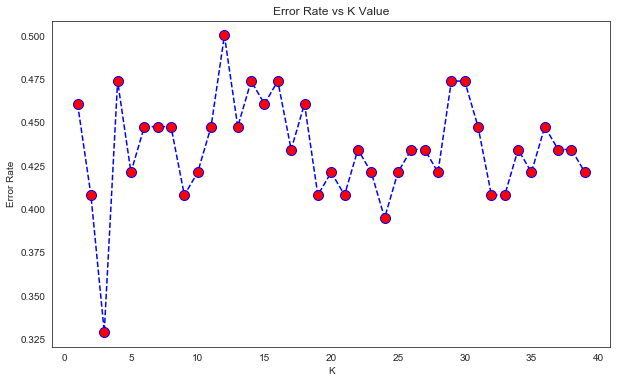

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [117]:
# If we choose k=3 where error rate is the lowest
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(ohe.inverse_transform(y_test),ohe.inverse_transform(pred)))
print('\n')
print(classification_report(ohe.inverse_transform(y_test),ohe.inverse_transform(pred)))

[[18  0 15]
 [ 0  0  1]
 [ 9  0 33]]


              precision    recall  f1-score   support

   Decreased       0.67      0.55      0.60        33
        Flat       0.00      0.00      0.00         1
   Increased       0.67      0.79      0.73        42

    accuracy                           0.67        76
   macro avg       0.45      0.44      0.44        76
weighted avg       0.66      0.67      0.66        76



/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

